# IOU

In [1]:
def calculate_lou(bbox1, bbox2):
    x1_1, y1_1, x2_1, y2_1 = bbox1
    x1_2, y1_2, x2_2, y2_2 = bbox2
    
    # 교차 영역의 좌표계산
    x_left = max(x1_1, x1_2)
    y_top = max(y1_1, y1_2)
    x_right = max(x2_1, x2_2)
    y_bottom = max(y2_1, y2_2)
    
    # 교차 영역의 넓이 계산
    intersection_area = max(0, x_right - x_left +1) * max(0, y_bottom - y_top +1)
    
    # 각 영역의 넓이 계산
    bbox1_area = (x2_1 - x1_1 +1) * (y2_1 - y1_1 +1)
    bbox2_area = (x2_2 - x1_2 +1) * (y2_2 - y1_2 +1)
    
    iou = intersection_area / (bbox1_area + bbox2_area - intersection_area)
    
    return iou

In [2]:
bbox1 = [50, 50, 200, 200]
bbox2 = [100, 100, 300, 300]

iou = calculate_lou(bbox1, bbox2)
print('iou: ', iou)

iou:  1.771895969475023


# Dice Coefficient

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def dice_coefficient(pred_mask, true_mask):
    intersection = np.logical_and(pred_mask, true_mask)
    dice = (2.0 * intersection.sum()) / (pred_mask.sum() + true_mask.sum())
    return dice

In [5]:
def plot_masks(pred_mask, true_mask):
    plt.subplot(1,2,1)
    plt.imshow(pred_mask, cmap='gray')
    plt.title('Predicted mask')
    
    plt.subplot(1,2,2)
    plt.imshow(true_mask, cmap='gray')
    plt.title('True mask')
    
    plt.show()

dice:  0.7692307692307693


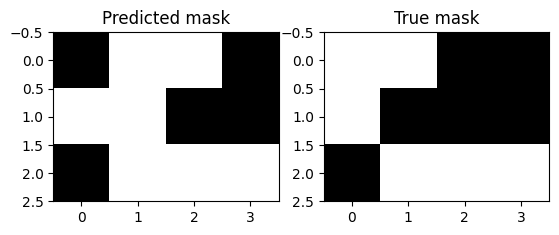

In [6]:
pred_mask = np.array([[0,1,1,0], [1,1,0,0], [0,1,1,1]])
true_mask = np.array([[1,1,0,0], [1,0,0,0], [0,1,1,1]])

dice = dice_coefficient(pred_mask, true_mask)
print('dice: ', dice)

plot_masks(pred_mask, true_mask)